<a href="https://colab.research.google.com/github/zainsuch19/entropy-neural-network/blob/main/entropy_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an
an input signal, my network will output a single representing its shannons entropy'''

'Shanons entropy is a measure of the uncertainity or randomness in a signal. Given an\nan input signal, my network will output a single representing its shannons entropy'

In [ ]:
'''We will generate synthetic data that represents signal segments and their
corresponding shannon entropy
H(X) = -sum(p(x)log(p(x)))
'''

'We will generate synthetic data that represents signal segments and their\ncorresponding shannon entropy\nH(X) = -sum(p(x)log(p(x)))\n'

In [ ]:
import numpy as np

def generate_synthetic_data(num_samples=10000, num_bins=10):
    X = np.random.rand(num_samples, 100)  # Generate random input data
    y = []

    for sample in X:
        hist, _ = np.histogram(sample, bins=num_bins, range=(0, 1), density=True)
        hist += 1e-9  # Prevent log(0)
        entropy = -np.sum(hist * np.log(hist))
        y.append(entropy)

    y = np.array(y).reshape(-1, 1)
    return X, y

# Example of generating data
X, y = generate_synthetic_data()
print(X.shape, y.shape)  # Should output (10000, 100), (10000, 1)


(10000, 100) (10000, 1)


In [ ]:
#Implementing several dense layers with ReLU(Rectified Linear Unit)

import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_shape=(100,)):
    model = models.Sequential()

    # Add input layer (Flatten the input)
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))

    # Output layer
    model.add(layers.Dense(1, activation='linear'))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    return model

# Build the model
model = build_model()
model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,297 (91.00 KB)

 Trainable params: 23,297 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''Now choosing a loss function. For this task mean squared error is a good choice'''
#Training the model
# Train the model
history = model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X, y)
print(f"Model Loss: {loss}, Mean Absolute Error: {mae}")


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0580 - mae: 0.1857 - val_loss: 0.0557 - val_mae: 0.1858
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0461 - mae: 0.1672 - val_loss: 0.0565 - val_mae: 0.1810
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0472 - mae: 0.1689 - val_loss: 0.0559 - val_mae: 0.1811
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0472 - mae: 0.1683 - val_loss: 0.0564 - val_mae: 0.1802
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0462 - mae: 0.1668 - val_loss: 0.0552 - val_mae: 0.1807
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0464 - mae: 0.1684 - val_loss: 0.0549 - val_mae: 0.1809
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0469 - mae: 0.1701 - val_loss: 0.0553 - val_mae: 0.1825
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0451 - mae: 0.1656 - val_loss: 0.0547 - val_mae: 0.1824
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


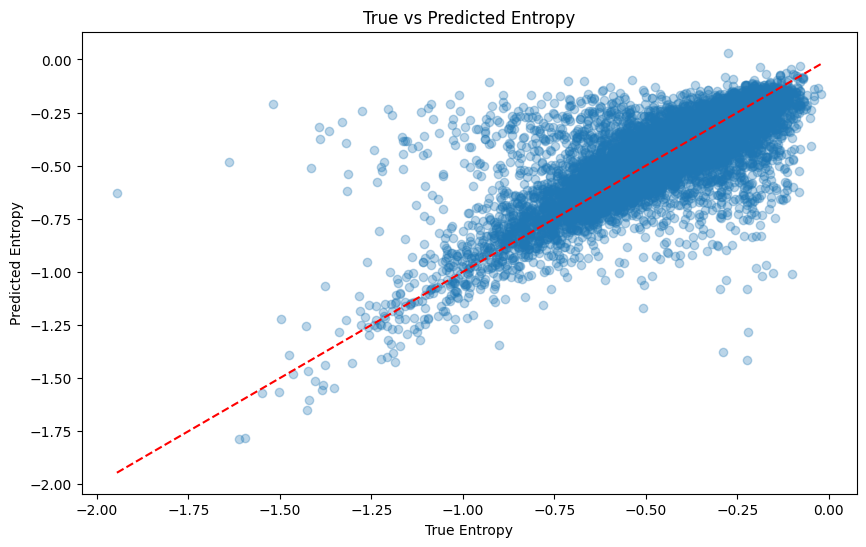

In [ ]:
import matplotlib.pyplot as plt

# Predict entropy for the test data
y_pred = model.predict(X)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line of equality
plt.xlabel("True Entropy")
plt.ylabel("Predicted Entropy")
plt.title("True vs Predicted Entropy")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming X and y are your input features and target variable
# X: features (input variables)
# y: target (output variable, i.e., Shannon's entropy)

# Step 1: Split the data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Further split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
# 0.25 x 0.8 = 0.2 of the original data set, resulting in 60/20/20 split

# Step 3: Normalize the features (very important for neural networks)
scaler = StandardScaler()

# Fit the scaler on the training data and transform
X_train = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test sets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.9941 - mae: 0.7244 - val_loss: 0.2549 - val_mae: 0.3084
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3416 - mae: 0.3818 - val_loss: 0.2240 - val_mae: 0.2861
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2609 - mae: 0.3207 - val_loss: 0.2075 - val_mae: 0.2731
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2253 - mae: 0.2916 - val_loss: 0.1938 - val_mae: 0.2630
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2053 - mae: 0.2752 - val_loss: 0.1841 - val_mae: 0.2569
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1938 - mae: 0.2681 - val_loss: 0.1810 - val_mae: 0.2585
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1845 - mae: 0.2623 - val_loss: 0.1729 - val_mae: 0.2538
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1766 - mae: 0.2598 - val_loss: 0.1674 - val_mae: 0.2526
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1690 - mae: 0.2548 - va

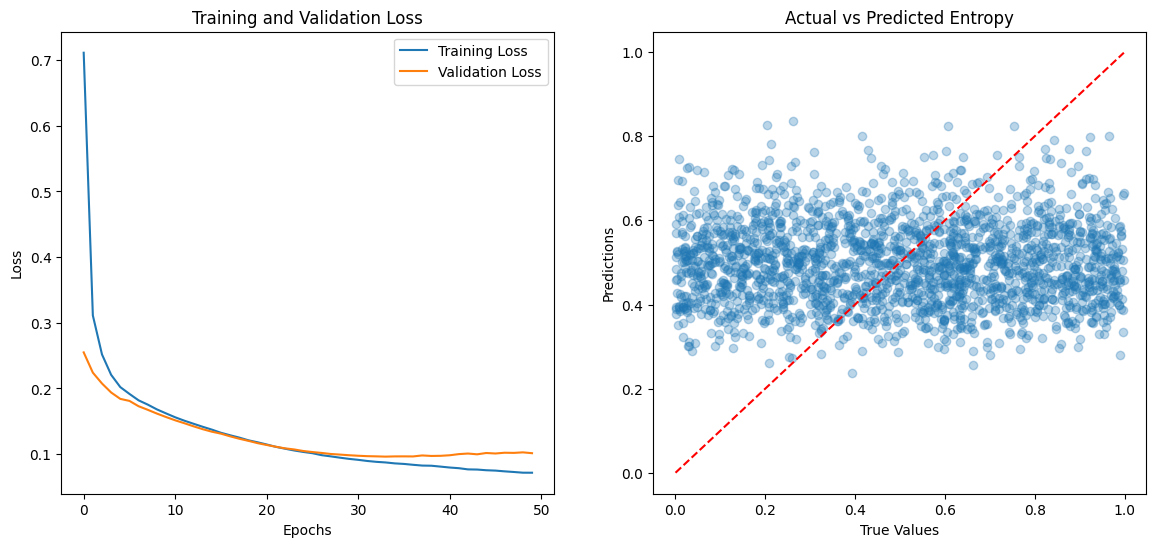

Mean Absolute Error: 0.2599070593224649


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='linear')
])

# Compile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=64,
                    verbose=1)

# Predict entropy for the test data
y_pred = model.predict(X_test)

# Plot the training and validation loss
plt.figure(figsize=(14, 6))

# Training and Validation Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.title('Actual vs Predicted Entropy')
plt.xlabel('True Values')
plt.ylabel('Predictions')

plt.show()

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
